In [1]:
import sqlite3
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
conn = sqlite3.Connection("zillow.sqlite")
df = pd.read_csv('Data/zillow_data.csv')
#df.to_sql(name='zillow_df', con=conn)

In [2]:
def cutoff(df):
    ct = round(df.shape[0]*0.8)
    return ct
    
#def train_test(df):
    cutoff = round(df.shape[0]*0.8)
    train = df[:cutoff]
    test = df[cutoff:]
    return train, test

def acf_pacf(df):
    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(13,8))
    #Make ACF plot
    plot_acf(df, ax=ax1)
    #Make PACF plot
    plot_pacf(df, ax=ax2)
    plt.show();

In [3]:
def model_fit(df, train, pdq=(1,0,1)):
    model = SARIMAX(train, order=pdq)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return results

In [4]:
def train_RMSE(df, pdq=(1,0,1), display=True):
    model = SARIMAX(train, order=pdq)
    train_result = model.fit()
    train_pred = train_result.predict(typ='levels')
    rmse = np.sqrt(mse(df, train_pred))
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        train[-60:].plot(label='Actual',color='b')
        train_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Returns')
        plt.show();

In [5]:
def model_fit(df, test, pdq=(1,0,1)):
    model = SARIMAX(test, order=pdq)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return results

In [6]:
def test_RMSE(df, pdq=(1,0,1), display=True):
    model = SARIMAX(df, order=pdq)
    test_result = model.fit()
    test_pred = test_result.predict(typ='levels')
    rmse = np.sqrt(mse(df, test_pred))
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        test[-60:].plot(label='Actual',color='b')
        test_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Test Data vs. Predicted Returns')
        plt.show();

In [7]:
#def forecast_model(df, pdq=(1,0,1), pdqs=(0,0,0,1), display=True):
model = SARIMAX(df, order=pdq, seasonal_order=pdqs)
model_fit = model.fit()
predictions = model_fit.get_prediction(start='2018-04',end='2028-04', dynamic=True)
prediction_confidence_interval = predictions.conf_int()
if display:
        fig, ax = plt.subplots(figsize=(13,6))
        predictions.predicted_mean.plot(label='Forecast')
        ax.fill_between(prediction_confidence_interval.index,prediction_confidence_interval.iloc[:, 0],prediction_confidence_interval.iloc[:, 1], color='k', alpha=.25,label='Conf Interval')
        plt.title('Prediction of Monthly Returns')
        plt.xlabel('Time')
        plt.legend(loc='best')
        plt.show();
year_1 = (1+predictions.predicted_mean[:12]).prod()-1
year_3 = (1+predictions.predicted_mean[:36]).prod()-1
year_5 = (1+predictions.predicted_mean[:60]).prod()-1
year_10 = (1+predictions.predicted_mean).prod()-1
print(f'Total expected return in 1 year: {round(year_1*100,2)}%')
print(f'Total expected return in 3 years: {round(year_3*100,2)}%')
print(f'Total expected return in 5 year: {round(year_5*100,2)}%')
print(f'Total expected return in 10 years: {round(year_10*100,2)}%')


NameError: name 'pdq' is not defined

In [57]:
def forecast_model(df,pdq=(1,0,1),display=True,zc='input zipcode'):
    model = SARIMAX(df, order=pdq)
    model_fit = model.fit()
    output = model_fit.get_prediction(start='2018-04',end='2028-04', dynamic=True)
    forecast_ci = output.conf_int()
    if display:
        fig, ax = plt.subplots(figsize=(13,6))
        output.predicted_mean.plot(label='Forecast')
        ax.fill_between(forecast_ci.index,forecast_ci.iloc[:, 0],forecast_ci.iloc[:, 1],
                        color='k', alpha=.25,label='Conf Interval')
        plt.title('Forecast of Monthly Returns')
        plt.xlabel('Time')
        plt.legend(loc='best')
        plt.show()
    year_1= (1+output.predicted_mean[:12]).prod()-1
    year_3=(1+output.predicted_mean[:36]).prod()-1
    year_5= (1+output.predicted_mean[:60]).prod()-1
    year_10=(1+output.predicted_mean).prod()-1
    print(f'Total expected return in 1 year: {round(year_1*100,2)}%')
    print(f'Total expected return in 3 years: {round(year_3*100,2)}%')
    print(f'Total expected return in 5 year: {round(year_5*100,2)}%')
    print(f'Total expected return in 10 years: {round(year_10*100,2)}%')
    tot_ret = [zc,year_1,year_3,year_5,year_10]
    return tot_ret

In [11]:
print(df.SizeRank.describe(),'\n')

count    14723.000000
mean      7362.000000
std       4250.308342
min          1.000000
25%       3681.500000
50%       7362.000000
75%      11042.500000
max      14723.000000
Name: SizeRank, dtype: float64 



In [12]:
sr_25 = df.SizeRank.quantile(q=0.25)
sr_25

3681.5

In [13]:
zc_top25 = df[df['SizeRank'] < sr_25].drop(['RegionID'], axis=1)
print(f'Amount of zipcodes: {len(zc_top25)}')

Amount of zipcodes: 3681


In [40]:
zc_top25

,RegionName,City,State,Metro,CountyName,SizeRank,2008-04,2008-05,2008-06,2008-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,yr_avg,ROI,std,mean,CV
0,60657,Chicago,IL,Chicago,Cook,1,865100.0,859000.0,851500.0,843800.0,...,1018700,1024400,1030700,1033800,1030600,760570.029225,0.191307,95448.656694,8.559331e+05,0.111514
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,211200.0,209500.0,207900.0,206700.0,...,316600,318100,319600,321100,321800,234914.306831,0.523674,41677.869365,2.368264e+05,0.175985
2,77494,Katy,TX,Houston,Harris,3,249500.0,248300.0,247800.0,247600.0,...,321200,321200,323000,326900,329900,241395.998500,0.322244,32712.079470,2.784645e+05,0.117473
3,60614,Chicago,IL,Chicago,Cook,4,1144100.0,1135600.0,1125400.0,1113900.0,...,1299000,1302700,1306400,1308500,1307000,969807.062184,0.142383,128917.820077,1.101100e+06,0.117081
4,79936,El Paso,TX,El Paso,El Paso,5,128300.0,127300.0,126300.0,125400.0,...,120300,120300,120500,121000,121500,90358.385378,-0.053001,3574.889276,1.165091e+05,0.030683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,75110,Corsicana,TX,Corsicana,Navarro,3677,74000.0,73900.0,73600.0,73300.0,...,91100,92000,92500,92700,92800,67292.065137,0.254054,7001.057673,7.349504e+04,0.095259
3677,95348,Merced,CA,Merced,Merced,3678,192500.0,184900.0,178400.0,173100.0,...,261500,263900,266300,269500,272500,194237.054664,0.415584,42640.491724,1.804785e+05,0.236264
3678,90621,Buena Park,CA,Los Angeles-Long Beach-Anaheim,Orange,3679,461800.0,451600.0,442400.0,434600.0,...,559000,564000,568500,572800,575000,416695.962557,0.245128,70238.538294,4.283876e+05,0.163960
3679,31093,Warner Robins,GA,Warner Robins,Houston,3680,79100.0,78900.0,78400.0,77800.0,...,64900,66400,67500,68600,69400,49839.046012,-0.122630,6207.902411,6.371901e+04,0.097426


In [43]:
zc_top25['yr_avg']=zc_top25.iloc[:,-12:].mean(skipna=True, axis=1)

In [42]:
zc_top25

,RegionName,City,State,Metro,CountyName,SizeRank,2008-04,2008-05,2008-06,2008-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,yr_avg,ROI,std,mean,CV
0,60657,Chicago,IL,Chicago,Cook,1,865100.0,859000.0,851500.0,843800.0,...,1018700,1024400,1030700,1033800,1030600,739421.003883,0.191307,95448.656694,8.559331e+05,0.111514
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,211200.0,209500.0,207900.0,206700.0,...,316600,318100,319600,321100,321800,228309.943511,0.523674,41677.869365,2.368264e+05,0.175985
2,77494,Katy,TX,Houston,Harris,3,249500.0,248300.0,247800.0,247600.0,...,321200,321200,323000,326900,329900,234664.415041,0.322244,32712.079470,2.784645e+05,0.117473
3,60614,Chicago,IL,Chicago,Cook,4,1144100.0,1135600.0,1125400.0,1113900.0,...,1299000,1302700,1306400,1308500,1307000,942627.095144,0.142383,128917.820077,1.101100e+06,0.117081
4,79936,El Paso,TX,El Paso,El Paso,5,128300.0,127300.0,126300.0,125400.0,...,120300,120300,120500,121000,121500,87886.861937,-0.053001,3574.889276,1.165091e+05,0.030683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,75110,Corsicana,TX,Corsicana,Navarro,3677,74000.0,73900.0,73600.0,73300.0,...,91100,92000,92500,92700,92800,65490.709454,0.254054,7001.057673,7.349504e+04,0.095259
3677,95348,Merced,CA,Merced,Merced,3678,192500.0,184900.0,178400.0,173100.0,...,261500,263900,266300,269500,272500,188921.392553,0.415584,42640.491724,1.804785e+05,0.236264
3678,90621,Buena Park,CA,Los Angeles-Long Beach-Anaheim,Orange,3679,461800.0,451600.0,442400.0,434600.0,...,559000,564000,568500,572800,575000,405201.876104,0.245128,70238.538294,4.283876e+05,0.163960
3679,31093,Warner Robins,GA,Warner Robins,Houston,3680,79100.0,78900.0,78400.0,77800.0,...,64900,66400,67500,68600,69400,48638.827624,-0.122630,6207.902411,6.371901e+04,0.097426


In [16]:
print(zc_top25['yr_avg'].describe(),'\n')

count    3.681000e+03
mean     3.612590e+05
std      5.389645e+05
min      3.632500e+04
25%      1.640917e+05
50%      2.428333e+05
75%      3.946583e+05
max      1.858138e+07
Name: yr_avg, dtype: float64 



In [17]:
zc_top25 = zc_top25.drop(zc_top25.columns[6:150], axis=1)
zc_top25

,RegionName,City,State,Metro,CountyName,SizeRank,2008-04,2008-05,2008-06,2008-07,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,yr_avg
0,60657,Chicago,IL,Chicago,Cook,1,865100.0,859000.0,851500.0,843800.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,1.014358e+06
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,211200.0,209500.0,207900.0,206700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,3.141667e+05
2,77494,Katy,TX,Houston,Harris,3,249500.0,248300.0,247800.0,247600.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,3.221750e+05
3,60614,Chicago,IL,Chicago,Cook,4,1144100.0,1135600.0,1125400.0,1113900.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.295967e+06
4,79936,El Paso,TX,El Paso,El Paso,5,128300.0,127300.0,126300.0,125400.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,1.200167e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,75110,Corsicana,TX,Corsicana,Navarro,3677,74000.0,73900.0,73600.0,73300.0,...,86500,86900,87700,89300,91100,92000,92500,92700,92800,8.890833e+04
3677,95348,Merced,CA,Merced,Merced,3678,192500.0,184900.0,178400.0,173100.0,...,250800,253300,256700,259300,261500,263900,266300,269500,272500,2.580250e+05
3678,90621,Buena Park,CA,Los Angeles-Long Beach-Anaheim,Orange,3679,461800.0,451600.0,442400.0,434600.0,...,543900,548300,552400,555400,559000,564000,568500,572800,575000,5.546250e+05
3679,31093,Warner Robins,GA,Warner Robins,Houston,3680,79100.0,78900.0,78400.0,77800.0,...,61500,62700,63300,63800,64900,66400,67500,68600,69400,6.424167e+04


In [18]:
#Calculate historical return on investment
zc_top25['ROI']= (zc_top25['2018-04']/zc_top25['2008-04'])-1

#Calculate standard deviation of monthly values
zc_top25['std']=zc_top25.loc[:,'2008-04':'2018-04'].std(skipna=True, axis=1)

#Calculate historical mean value
zc_top25['mean']=zc_top25.loc[:,'2008-04':'2018-04'].mean(skipna=True, axis=1)

#Calculate coefficient of variance
zc_top25['CV']=zc_top25['std']/zc_top25['mean']

#Show calculated values
zc_top25[['RegionName','std','mean','ROI','CV']].head()

,RegionName,std,mean,ROI,CV
0,60657,95448.656694,8.559331e+05,0.191307,0.111514
1,75070,41677.869365,2.368264e+05,0.523674,0.175985
2,77494,32712.079470,2.784645e+05,0.322244,0.117473
3,60614,128917.820077,1.101100e+06,0.142383,0.117081
4,79936,3574.889276,1.165091e+05,-0.053001,0.030683


In [19]:
#Descriptive statistics of coefficients of variance.
print(zc_top25.CV.describe())

#Define upper limit of CV according to risk profile.
upper_cv = zc_top25.CV.quantile(.65)
print(f'\nCV upper limit: {upper_cv}')

#Get the 5 zipcodes with highest ROIs within the firms risk profile.
zc_best5 = zc_top25[zc_top25['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:5]
print('\n Best 5 Zipcodes:')

zc_best5

count    3681.000000
mean        0.138659
std         0.071520
min         0.011953
25%         0.080673
50%         0.129478
75%         0.184179
max         0.426992
Name: CV, dtype: float64

CV upper limit: 0.1593460089856141

 Best 5 Zipcodes:


,RegionName,City,State,Metro,CountyName,SizeRank,2008-04,2008-05,2008-06,2008-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,yr_avg,ROI,std,mean,CV
180,99301,Pasco,WA,Kennewick,Franklin,181,130400.0,130000.0,129900.0,129700.0,...,216000,217600,218300,218100,217600,211883.333333,0.668712,23394.532219,164642.975207,0.142093
602,76051,Grapevine,TX,Dallas-Fort Worth,Tarrant,603,215900.0,215300.0,214500.0,213900.0,...,334900,333900,336500,341400,344400,334258.333333,0.595183,40510.242710,254891.735537,0.158931
2362,78210,San Antonio,TX,San Antonio,Bexar,2363,75400.0,74700.0,74100.0,73500.0,...,110000,111900,114500,117200,119400,107516.666667,0.583554,11843.572027,75488.429752,0.156893
1211,76039,Euless,TX,Dallas-Fort Worth,Tarrant,1212,147200.0,147000.0,146700.0,146500.0,...,222600,226100,228400,229800,231000,219933.333333,0.569293,24661.088315,165685.123967,0.148843
1756,75028,Flower Mound,TX,Dallas-Fort Worth,Denton,1757,217900.0,217600.0,217600.0,217800.0,...,331900,332000,333700,337300,339600,328366.666667,0.558513,37204.961198,256142.975207,0.145251


In [20]:
zc_best5 = zc_best5.drop(['City','State','Metro', 'CountyName', 'SizeRank', 'yr_avg', 'ROI', 'std', 'mean', 'CV'],axis=1)


In [21]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [22]:
ts_best5 = melt_data(zc_best5).set_index('time')
ts_best5

,RegionName,value
time,,
2008-04-01,99301,130400.0
2008-04-01,76051,215900.0
2008-04-01,78210,75400.0
2008-04-01,76039,147200.0
2008-04-01,75028,217900.0
...,...,...
2018-04-01,99301,217600.0
2018-04-01,76051,344400.0
2018-04-01,78210,119400.0


In [23]:
dfs_ts = []
for zc in ts_best5.RegionName.unique():
    #Create separate dataframes for each zipcode with a monthly frequency.
    new_df = ts_best5[ts_best5['RegionName']==zc].asfreq('MS')
    dfs_ts.append(new_df)

In [24]:
print('Time series data for the 5 zipcodes:\n',ts_best5.head())

Time series data for the 5 zipcodes:
             RegionName     value
time                            
2008-04-01       99301  130400.0
2008-04-01       76051  215900.0
2008-04-01       78210   75400.0
2008-04-01       76039  147200.0
2008-04-01       75028  217900.0


In [25]:
dfs_ts[0]

,RegionName,value
time,,
2008-04-01,99301,130400.0
2008-05-01,99301,130000.0
2008-06-01,99301,129900.0
2008-07-01,99301,129700.0
2008-08-01,99301,129500.0
...,...,...
2017-12-01,99301,216000.0
2018-01-01,99301,217600.0
2018-02-01,99301,218300.0


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

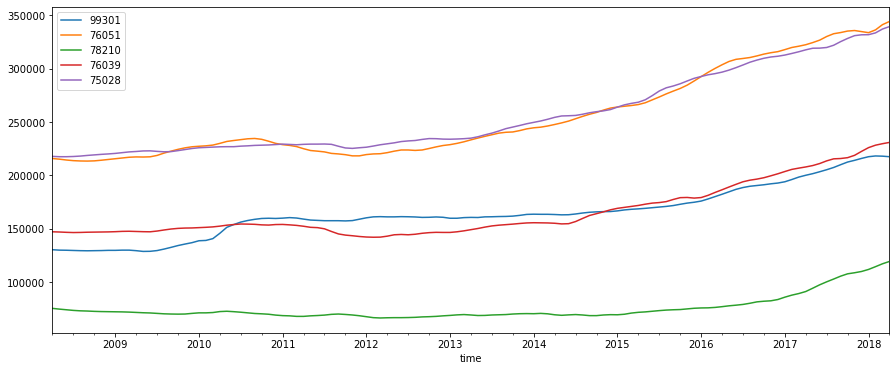

In [27]:
for i in range(5):
    dfs_ts[i].value.plot(label=dfs_ts[i].RegionName[0],figsize=(15,6))
    plt.legend();

In [28]:
import numpy as np

In [29]:
#Calculate monthly returns in new column 'ret' for each zipcode.
for zc in range(len(dfs_ts)):
    dfs_ts[zc]['monthly_return']=np.nan*len(dfs_ts[zc])
    for i in range(len(dfs_ts[zc])-1):
        dfs_ts[zc]['monthly_return'][i+1]= (dfs_ts[zc].value.iloc[i+1] / dfs_ts[zc].value.iloc[i]) - 1        

<ipython-input-29-77ae08bcfaba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_ts[zc]['monthly_return'][i+1]= (dfs_ts[zc].value.iloc[i+1] / dfs_ts[zc].value.iloc[i]) - 1


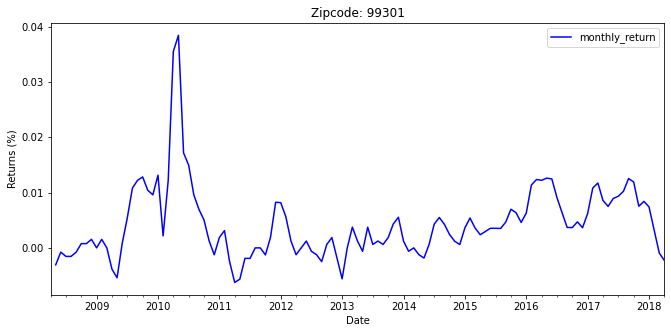

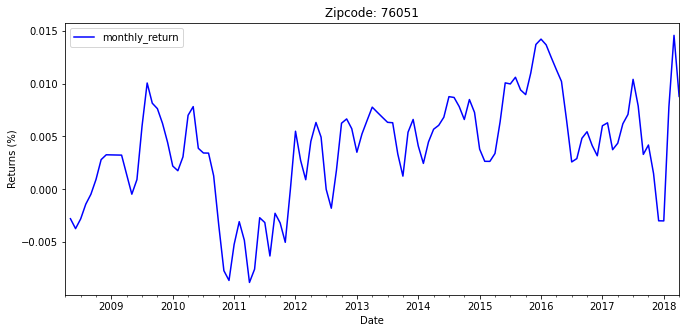

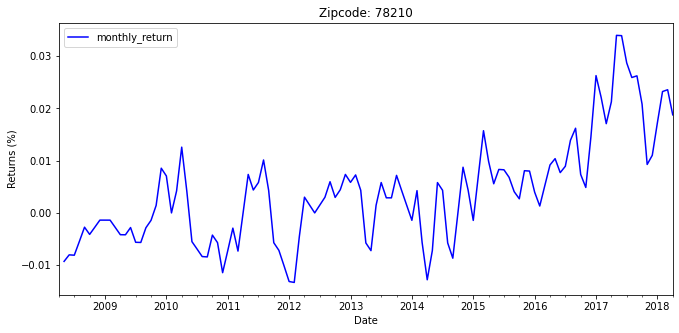

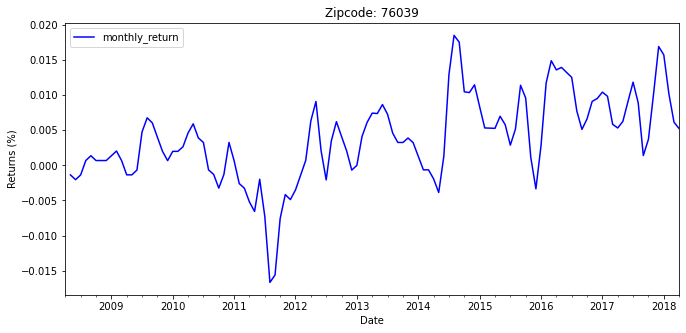

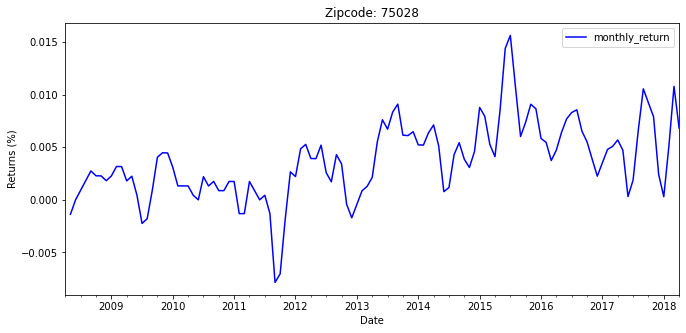

In [30]:
#Plot the monthly returns of each zipcode
for i in range(len(dfs_ts)):
    dfs_ts[i].monthly_return.plot(figsize=(11,5), color = 'b')
    plt.title(f'Zipcode: {dfs_ts[i].RegionName[0]}')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend(loc='best')
    plt.show()

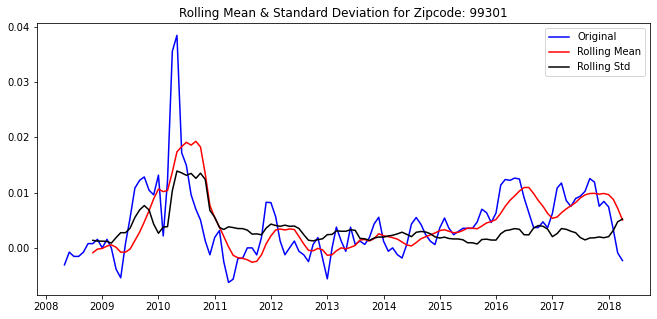

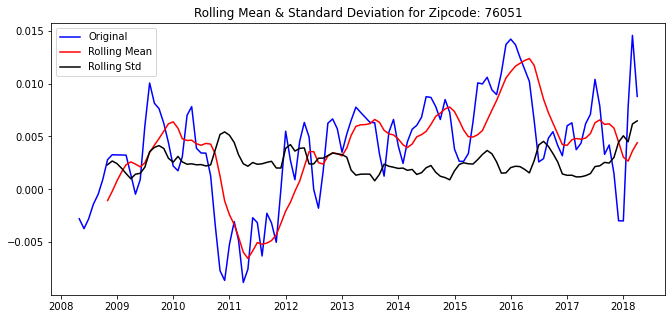

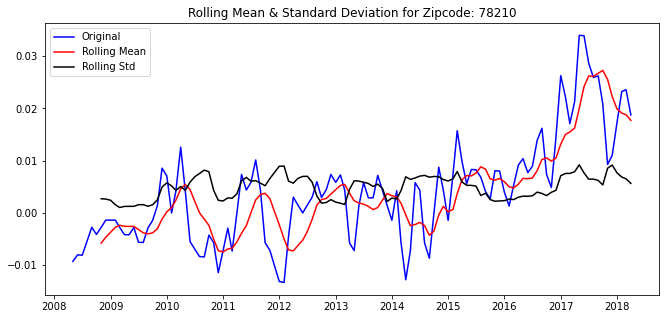

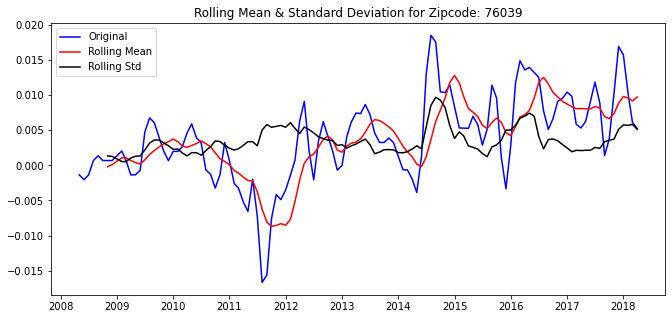

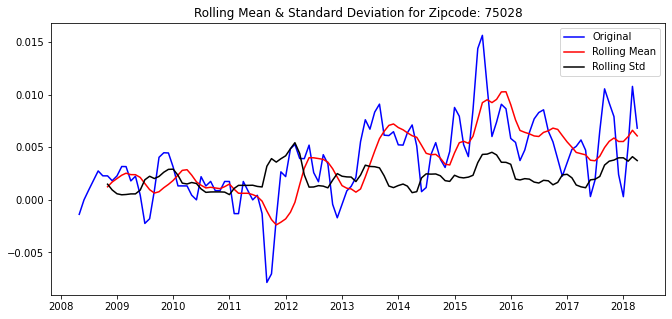

In [31]:
for i in range(len(dfs_ts)):
    rolmean = dfs_ts[i].monthly_return.rolling(window = 7, center = False).mean()
    rolstd = dfs_ts[i].monthly_return.rolling(window = 7, center = False).std()
    fig = plt.figure(figsize=(11,5))
    orig = plt.plot(dfs_ts[i].monthly_return, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {dfs_ts[i].RegionName[0]}')
    plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
for i in range(5):
    results = adfuller(dfs_ts[i].monthly_return.dropna())
    print(f'ADFuller test p-value for zipcode: {dfs_ts[i].RegionName[0]}')
    print('p-value:',results[1])
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 99301
p-value: 0.044745366240098595
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 76051
p-value: 0.03861141471278384
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 78210
p-value: 0.7572691938713019
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 76039
p-value: 0.1016113101832512
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 75028
p-value: 0.7111859983981811
Fail to reject the null hypothesis. Data is not stationary.



[            RegionName     value  monthly_return
 time                                            
 2008-04-01       99301  130400.0             NaN
 2008-05-01       99301  130000.0       -0.003067
 2008-06-01       99301  129900.0       -0.000769
 2008-07-01       99301  129700.0       -0.001540
 2008-08-01       99301  129500.0       -0.001542
 ...                ...       ...             ...
 2017-12-01       99301  216000.0        0.008403
 2018-01-01       99301  217600.0        0.007407
 2018-02-01       99301  218300.0        0.003217
 2018-03-01       99301  218100.0       -0.000916
 2018-04-01       99301  217600.0       -0.002293
 
 [121 rows x 3 columns],
             RegionName     value  monthly_return
 time                                            
 2008-04-01       76051  215900.0             NaN
 2008-05-01       76051  215300.0       -0.002779
 2008-06-01       76051  214500.0       -0.003716
 2008-07-01       76051  213900.0       -0.002797
 2008-08-01       76051

In [35]:
ts_99301 = dfs_ts[0].monthly_return.dropna()
ts_76051 = dfs_ts[1].monthly_return.dropna()
ts_78210 = dfs_ts[2].monthly_return.diff().dropna()
ts_76039 = dfs_ts[3].monthly_return.diff().dropna()
ts_75028 = dfs_ts[4].monthly_return.diff().dropna()
ts_60611 = 

In [37]:
import pmdarima as pm
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

## 99301

In [44]:
ct = cutoff(ts_99301)
ct

96

In [45]:
cutoff(ts_75028)

95

In [46]:
train_99301 = ts_99301[:ct]
test_99301 = ts_99301[ct:]

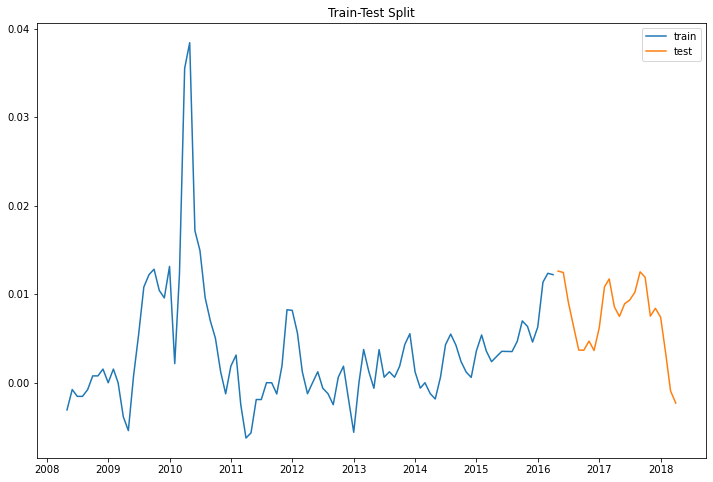

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_99301, label='train')
ax.plot(test_99301, label='test')
ax.set_title('Train-Test Split');
plt.legend()
plt.show();

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


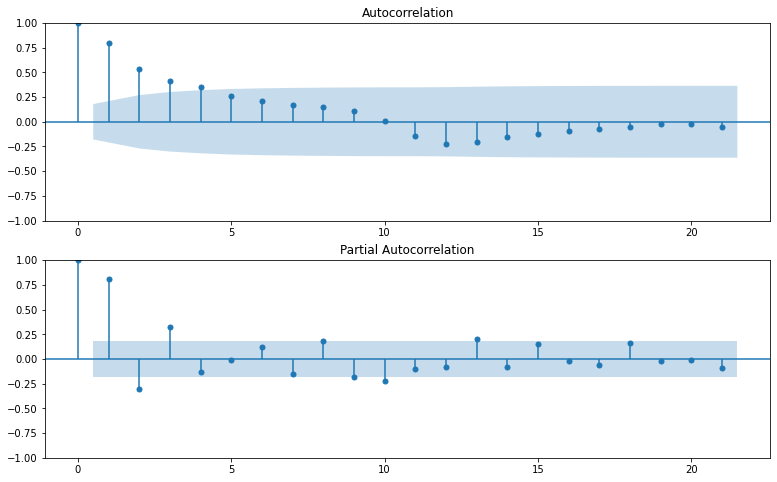

In [49]:
acf_pacf(ts_99301)

In [50]:
results_99301 = pm.auto_arima(ts_99301,information_criterion='aic',m=12,d=0,
                        start_p=1,start_q=1, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results_99301

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-1018.781, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-862.263, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-991.958, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-969.088, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-821.299, Time=0.03 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-1013.793, Time=0.62 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-1009.725, Time=0.66 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=-1010.214, Time=1.06 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=-992.112, Time=1.33 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-1004.559, Time=0.08 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=-1011.747, Time=0.85 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=-1001.433, Time=1.19 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-979.693, Time=0.56 sec
 ARIMA(1,0,0)(1,0

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

                               SARIMAX Results                                
Dep. Variable:         monthly_return   No. Observations:                   96
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 395.722
Date:                Wed, 16 Feb 2022   AIC                           -785.444
Time:                        14:03:48   BIC                           -777.751
Sample:                    05-01-2008   HQIC                          -782.334
                         - 04-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7068      0.044     15.958      0.000       0.620       0.794
ma.L1          0.5055      0.044     11.566      0.000       0.420       0.591
sigma2      1.512e-05    1.1e-06     13.741      0.0

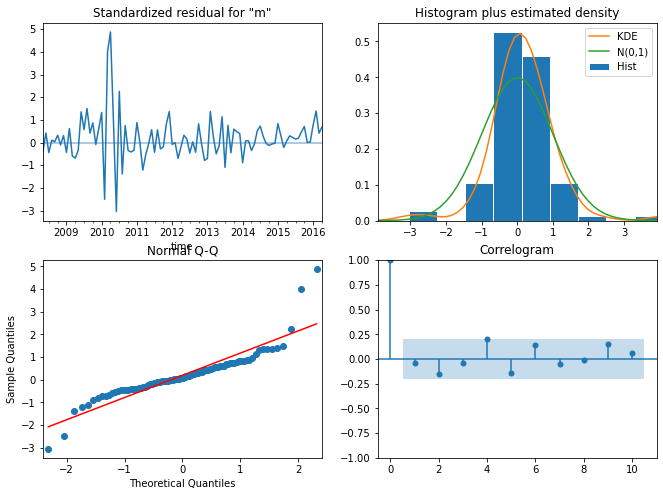

In [51]:
model_fit(train_99301, ts_99301[:ct], pdq=(1,0,1))

In [52]:
train_RMSE(train_99301, pdq=(1,0,1))

NameError: name 'train' is not defined

                               SARIMAX Results                                
Dep. Variable:         monthly_return   No. Observations:                   24
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 113.379
Date:                Wed, 16 Feb 2022   AIC                           -220.758
Time:                        14:03:58   BIC                           -217.224
Sample:                    05-01-2016   HQIC                          -219.820
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8853      0.074     11.983      0.000       0.740       1.030
ma.L1          0.5762      0.206      2.796      0.005       0.172       0.980
sigma2      4.096e-06   1.92e-06      2.136      0.0

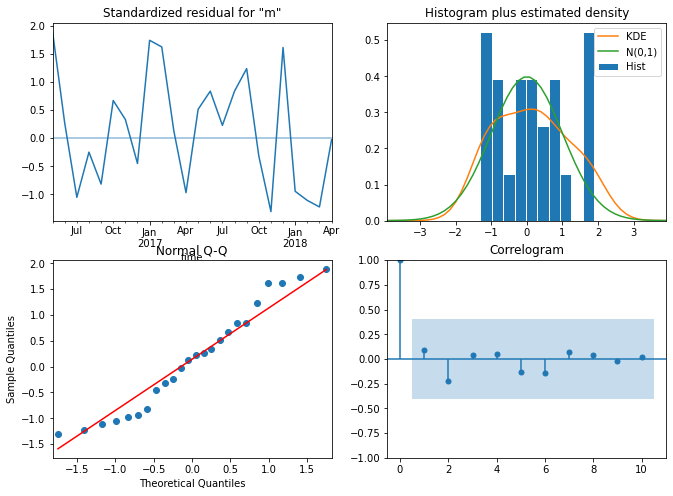

In [53]:
model_fit(test_99301, ts_99301[ct:], pdq=(1,0,1))

In [54]:
test_RMSE(test_99301, pdq=(1,0,1))

NameError: name 'mse' is not defined

In [55]:
from sklearn.metrics import mean_squared_error as mse

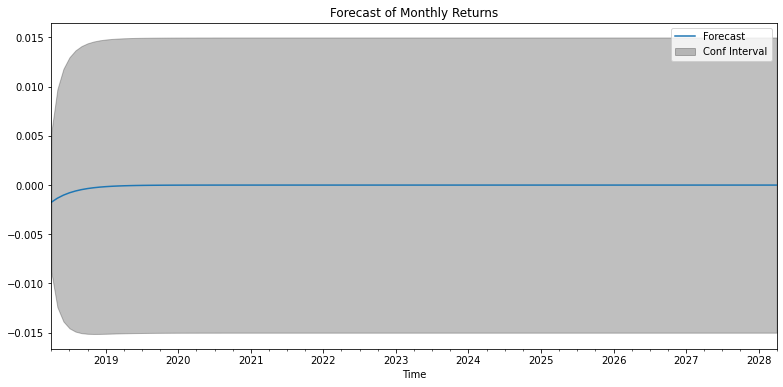

Total expected return in 1 year: -0.71%
Total expected return in 3 years: -0.74%
Total expected return in 5 year: -0.74%
Total expected return in 10 years: -0.74%


[99301,
 -0.007128340021981705,
 -0.007431522570668925,
 -0.007432032846618641,
 -0.007432033707043151]

In [58]:
forecast_model(ts_99301, pdq=(1,0,1), zc=99301)

## 76051

In [ ]:
cutoff(ts_76051)

In [ ]:
train_76051 = ts_76051[:ct]
test_76051 = ts_76051[ct:]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_76051, label='train')
ax.plot(test_76051, label='test')
ax.set_title('Train-Test Split');
plt.legend()
plt.show();

In [ ]:
acf_pacf(ts_76051)

In [ ]:
results_76051 = pm.auto_arima(ts_76051,information_criterion='aic',m=12,d=0,
                        start_p=1,start_q=1, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results_76051

In [ ]:
model_fit(train_76051, ts_76051[:ct], pdq=(1,0,1))

In [ ]:
train_RMSE(train_76051, pdq=(1,0,1))

In [ ]:
model_fit(test_76051, ts_76051[ct:], pdq=(1,0,1),pdqs=(2,0,1,12))

In [ ]:
test_RMSE(test_76051, pdq=(1,0,1))

In [ ]:
forecast_model(ts_76051, pdq=(1,0,1),zc=76051)

## 78210

In [ ]:
cutoff(ts_78210)

In [ ]:
train_78210 = ts_78210[:ct]
test_78210 = ts_78210[ct:]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_78210, label='train')
ax.plot(test_78210, label='test')
ax.set_title('Train-Test Split');
plt.legend()
plt.show();

In [ ]:
acf_pacf(ts_78210)

In [ ]:
results_78210 = pm.auto_arima(ts_78210,information_criterion='aic',m=12,d=0,
                        start_p=1,start_q=1, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results_78210

In [ ]:
model_fit(train_78210, ts_78210[:ct], pdq=(3,0,0))

In [ ]:
train_RMSE(train_78210, pdq=(3,0,0))

In [ ]:
model_fit(test_78210, ts_78210[ct:], pdq=(3,0,0), pdqs=(2,0,0,12))

In [ ]:
test_RMSE(test_78210, pdq=(3,0,0))

In [ ]:
forecast_model(ts_78210, pdq=(3,0,0),zc=78210)

## 76039

In [ ]:
cutoff(ts_76039)

In [ ]:
train_76039 = ts_76039[:ct]
test_76039 = ts_76039[ct:]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_76039, label='train')
ax.plot(test_76039, label='test')
ax.set_title('Train-Test Split');
plt.legend()
plt.show();

In [ ]:
acf_pacf(ts_76039)

In [ ]:
results_76039 = pm.auto_arima(ts_76039,information_criterion='aic',m=12,d=0,
                        start_p=1,start_q=1, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results_76039

In [ ]:
model_fit(train_76039, ts_76039[:ct], pdq=(0,0,1))

In [ ]:
train_RMSE(train_76039, pdq=(0,0,1))

In [ ]:
model_fit(test_76039, ts_76039[ct:], pdq=(0,0,1))

In [ ]:
test_RMSE(test_76039, pdq=(0,0,1))

In [ ]:
forecast_model(ts_76039, pdq=(0,0,1),zc=76039)

## 75028

In [ ]:
cutoff(ts_75028)

In [ ]:
train_75028 = ts_75028[:ct]
test_75028 = ts_75028[ct:]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_75028, label='train')
ax.plot(test_75028, label='test')
ax.set_title('Train-Test Split');
plt.legend()
plt.show();

In [ ]:
acf_pacf(ts_75028)

In [ ]:
results_75028 = pm.auto_arima(ts_75028,information_criterion='aic',m=12,d=0,
                        start_p=1,start_q=1, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results_75028

In [ ]:
model_fit(train_75028, ts_75028[:ct], pdq=(1,0,3))

In [ ]:
train_RMSE(train_75028, pdq=(1,0,3))

In [ ]:
model_fit(test_75028, ts_75028[ct:], pdq=(1,0,3),pdqs=(0,0,2,12))

In [ ]:
test_RMSE(test_75028, pdq=(1,0,3))

In [ ]:
forecast_model(ts_75028, pdq=(1,0,3),zc=75028)